In [2]:
import os
import sys
%matplotlib inline
sys.path.insert(1, r'C:\Users\smartin5\Repos\myNeurochat')
%load_ext autoreload
%autoreload 2

In [3]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot

In [4]:
spike = NSpike(system="Axona")
spike.set_name("CO")
spat = NSpatial(system="Axona")
spat.set_name("S0")

data_dir = "C:/Users/smartin5/recording_example"
spike_name = "010416b-LS3-50Hz10V5ms.2"
pos_name = "010416b-LS3-50Hz10V5ms_2.txt"
spike.set_filename(os.path.join(data_dir, spike_name))
spat.set_filename(os.path.join(data_dir, pos_name))

In [5]:
spike.load()
spat.load()
spike.set_unit_no(5)

ndata = NData()
ndata.spike = spike
ndata.spatial = spat

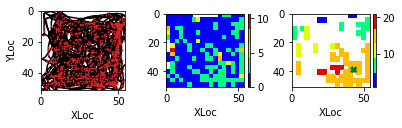

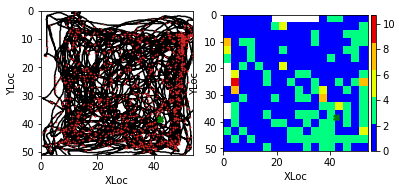

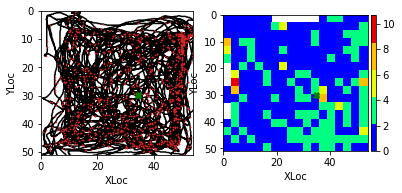

In [6]:
# Calculate place related statistics
pixel_size = 3
placeData = ndata.place(pixel=pixel_size, filter=[None, 3], range=[0, spat.get_duration()], chop_bound=0, fieldThresh=0.2, minPlaceFieldNeighbours=0, smoothPlace=False)
fig = nc_plot.loc_firing_and_place(placeData)

# Comparing different methods of obtaining the place field centroid
fig = nc_plot.loc_place_centroid(placeData, placeData['centroid'])
fig = nc_plot.loc_place_centroid(placeData, ndata.place_field_centroid_zscore(update=False, z_threshold=1))

In [7]:
# Test the angle calculation
import numpy as np
from neurochat.nc_utils import angle_between_points
a = np.array([1, 1.001])
b = np.array([1, 1])
c = np.array([1, 0])
print(angle_between_points(a, b, c))

180.0


In [8]:
print(ndata._results)

OrderedDict([('Spatial Skaggs', 0.22848170793809164), ('Spatial Sparsity', 0.772219143225364), ('Spatial Coherence', 0.9999999999999999), ('Place field Centroid x', 42.136505928122965), ('Place field Centroid y', 38.22437179315241)])


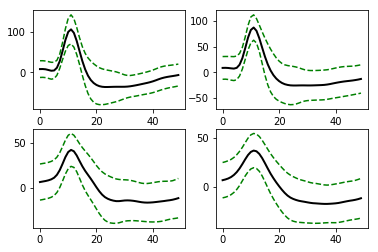

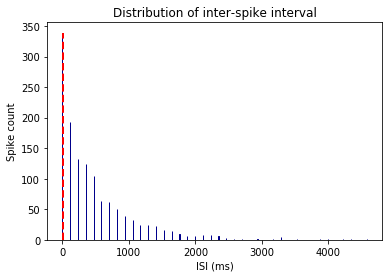

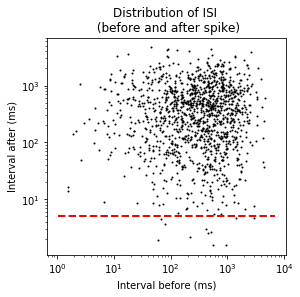

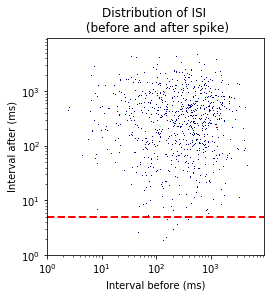

In [90]:
import matplotlib.pyplot as plt
wave_fig = nc_plot.wave_property(ndata.wave_property())
isi_fig = nc_plot.isi(ndata.isi())

In [121]:
def add_axes_to_fig(axes, new_axes, fig):
    for ax, new_ax in zip(axes, new_axes):
        ax.remove()
        ax.figure = fig
        fig.add_axes(ax)
        ax.set_position(new_ax.get_position())
        new_ax.remove()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

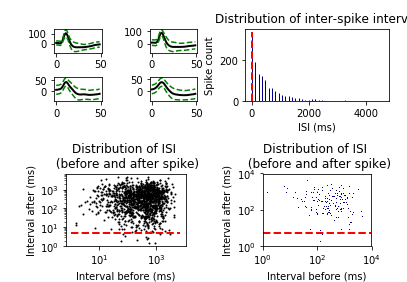

In [145]:
# Option number 1
import matplotlib.gridspec as gridspec

wave_fig = nc_plot.wave_property(ndata.wave_property())
isi_fig = nc_plot.isi(ndata.isi())
size = (5, 4)

gs = gridspec.GridSpec(*size, wspace=1, hspace=1)
fig1 = plt.figure(figsize=(16, 16))

wave_ax1 = fig1.add_subplot(gs[0, 0])
wave_ax2 = fig1.add_subplot(gs[0, 1])
wave_ax3 = fig1.add_subplot(gs[1, 0])
wave_ax4 = fig1.add_subplot(gs[1, 1])
wave_axes = [wave_ax1, wave_ax2, wave_ax3, wave_ax4]

add_axes_to_fig(wave_fig.axes, wave_axes, fig1)
plt.close(wave_fig)

isi_ax1 = fig1.add_subplot(gs[0:2, 2:])
isi_ax2 = fig1.add_subplot(gs[3:, 0:2])
isi_ax3 = fig1.add_subplot(gs[3:, 2:])
isi_axes = [isi_ax1, isi_ax2, isi_ax3]

isi_fig_axes = [figure.axes[0] for figure in isi_fig]
add_axes_to_fig(isi_fig_axes, isi_axes, fig1)

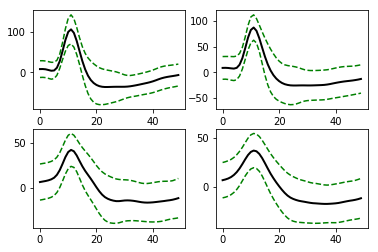

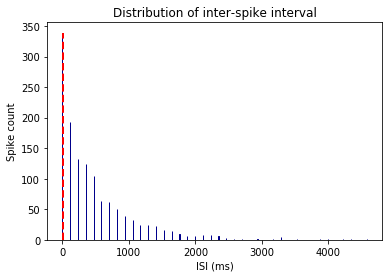

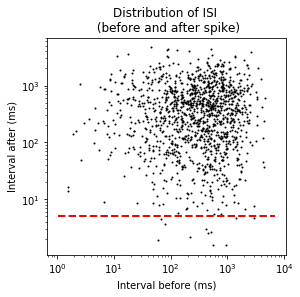

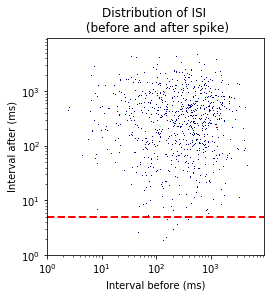

In [138]:
# Option 2
import matplotlib.pyplot as plt
from svgutils.compose import Figure
wave_fig = nc_plot.wave_property(ndata.wave_property())
plt.savefig("wave.svg")
isi_fig = nc_plot.isi(ndata.isi())
plt.savefig("isi.svg")
#Make a composed Figure